<table align ="left";background-color="#87CEEB">
<tr>
    <td bgcolor="#87CEEB"><font size=2>练习题：请用以下数据（可自行生成尝试，或用其他已有数据集）</font></td>
</tr>
<tr>
<td  bgcolor="#87CEEB"><font size=2>1、首先尝试调用sklearn的线性回归函数进行训练；</font></td>
</tr>
<tr>
<td bgcolor="#87CEEB"><font size=2>2、用最小二乘法的矩阵求解法训练数据；</font></td>
</tr>
<tr>    
<td  bgcolor="#87CEEB"><font size=2>3、用梯度下降法训练数据；</font></td>
</tr>
<tr>
    <td  bgcolor="#87CEEB"><font size=2>4、比较各方法得出的结果是否一致。</font></td>
</tr>
</table>

生成数据

In [1]:
#生成数据
import numpy as np
#生成随机数
np.random.seed(1234)
x = np.random.rand(500,3)
#构建映射关系，模拟真实的数据待预测值,映射关系为y = 4.2 + 5.7*x1 + 10.8*x2，可自行设置值进行尝试
y = x.dot(np.array([4.2,5.7,10.8]))

In [7]:
# 1、首先尝试调用sklearn的线性回归函数进行训练；

In [100]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# 调用模型
lr = LinearRegression(fit_intercept=True)
# 训练模型
lr.fit(x,y)
print("估计的参数值为：%s" %(lr.coef_))
# 计算R平方
print('R2:%s' %(lr.score(x,y)))
# 任意设定变量，预测目标值
x_test = np.array([2,4,5]).reshape(1,-1)
y_hat = lr.predict(x_test)
print("预测值为: %s" %(y_hat))

估计的参数值为：[ 4.2  5.7 10.8]
R2:1.0
预测值为: [85.2]


In [12]:
# 2、用最小二乘法的矩阵求解法训练数据；

In [102]:
class LR_LS():
    def __init__(self):
        self.w = None      
    def fit(self, X, y):
        # 最小二乘法矩阵求解
        #============================= show me your code =======================
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
        #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        #============================= show me your code =======================
        y_pred = np.sum(np.multiply(self.w,X))
        #============================= show me your code =======================
        return y_pred

if __name__ == "__main__":
    lr_ls = LR_LS()
    lr_ls.fit(x,y.reshape(-1,1))
    print("估计的参数值：{value}\n shape: {shape}".format(value=lr_ls.w, shape=lr_ls.w.shape))
    x_test = np.array([2,4,5]).reshape(-1,1)
    print("预测值为: %s" %(lr_ls.predict(x_test)))

估计的参数值：[[ 4.2]
 [ 5.7]
 [10.8]]
 shape: (3, 1)
预测值为: 85.19999999999995


In [57]:
# 3、梯度下降法

In [92]:
import matplotlib.pyplot as plt

In [97]:
class LR_GD():
    def __init__(self):
        self.w = None

    def fit(self, X, y, alpha=1, loss=1e-10):  # 设定步长为0.002,判断是否收敛的条件为1e-10
        y = y.reshape(-1, 1)  # 重塑y值的维度以便矩阵运算
        [m, d] = np.shape(X)  # 自变量的维度
        self.w = np.zeros((d)).reshape(-1, 1)  # 将参数的初始值定为0
        tol = 1e5
        fig,ax=plt.subplots()
        y1=[]
        # ============================= show me your code =======================
        while tol > loss:
            
            #implemention1:
            w_deriv = 0
            for i in range(m):
                w_deriv += -2 * np.dot(y[i] - np.dot(X[i].reshape(1, -1), self.w), X[i].reshape(1, -1))
            self.w -= (m_deriv.reshape(-1, 1) / m) * alpha
            tol = np.sum((y - np.dot(X, self.w)) ** 2)
            
            #implemention2:
            w_deriv = -2 * np.dot(X.T, y-np.dot(X,self.w))/m
            self.w -= w_deriv * alpha
            tol = np.sum((y - np.dot(X, self.w)) ** 2)
            
            # plot            
            y1.append(tol)
            ax.cla()
            ax.set_title("Loss")
            ax.set_xlabel("Iteration")
            ax.set_ylabel("Loss")
            ax.grid()
            ax.plot(y1,label='train')
            ax.legend(loc='best')


    # ============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred

估计的参数值为：[[ 4.20000019]
 [ 5.70000096]
 [10.79999881]]
预测值为：[[85.19999827]]


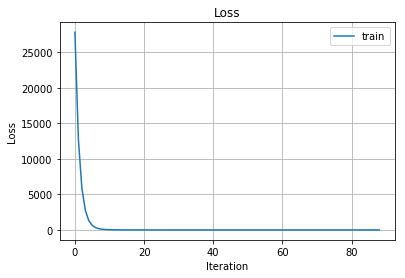

In [98]:
if __name__ == "__main__":
    lr_gd = LR_GD()
    lr_gd.fit(x,y)
    print("估计的参数值为：%s" %(lr_gd.w))
    x_test = np.array([2,4,5]).reshape(1,-1)
    print("预测值为：%s" %(lr_gd.predict(x_test)))